In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
from google.colab import files
uploaded = files.upload()

Saving baseball_salary.csv to baseball_salary.csv


In [3]:
baseball_data = pd.read_csv("baseball_salary.csv")
print(baseball_data.dtypes)

name         object
team         object
no_atbat      int64
no_hits       int64
no_home       int64
no_runs       int64
no_rbi        int64
no_bb         int64
yr_major      int64
cr_atbat      int64
cr_hits       int64
cr_home       int64
cr_runs       int64
cr_rbi        int64
cr_bb         int64
no_outs       int64
no_assts      int64
no_error      int64
salary      float64
league       object
division     object
position     object
dtype: object


In [4]:
# Preview data
baseball_data.head
print(baseball_data)

# Remove all non-numeric columns
baseball_data2 = baseball_data.drop(columns=['name', 'team', 'league', 'division', 'position'])
# baseball_data2 contains all our x variables plus the y variable

                   name          team  no_atbat  no_hits  no_home  no_runs  \
0    Robidoux, Billy Jo     Milwaukee       181       41        1       15   
1         Kingery, Mike    KansasCity       209       54        3       25   
2         Braggs, Glenn     Milwaukee       215       51        4       19   
3            Ford, Curt       StLouis       214       53        2       30   
4            Newman, Al      Montreal       185       37        1       23   
..                  ...           ...       ...      ...      ...      ...   
258        Smith, Ozzie       StLouis       514      144        0       67   
259      Mattingly, Don       NewYork       677      238       31      117   
260       Schmidt, Mike  Philadelphia       552      160       37       97   
261           Rice, Jim        Boston       618      200       20       98   
262       Murray, Eddie     Baltimore       495      151       17       61   

     no_rbi  no_bb  yr_major  cr_atbat  ...  cr_runs  cr_rbi  c

Explore Data (correlations, scatterplots)

         no_atbat     no_hits     no_home     no_runs      no_rbi       no_bb  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean   408.285171  109.159696   11.825095   55.490494   52.288973   41.722433   
std    142.633058   43.993289    8.826131   25.073763   25.713189   21.507032   
min    127.000000   32.000000    0.000000   13.000000    8.000000    3.000000   
25%    285.500000   73.000000    5.000000   34.000000   31.000000   24.000000   
50%    416.000000  108.000000    9.000000   53.000000   47.000000   37.000000   
75%    527.000000  142.000000   18.000000   73.000000   71.500000   57.500000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

         yr_major      cr_atbat      cr_hits     cr_home     cr_runs  \
count  263.000000    263.000000   263.000000  263.000000   263.00000   
mean     7.391635   2700.889734   733.920152   71.471483   368.08365   
std      4.790521   2290.314119   648.901189   86.0405

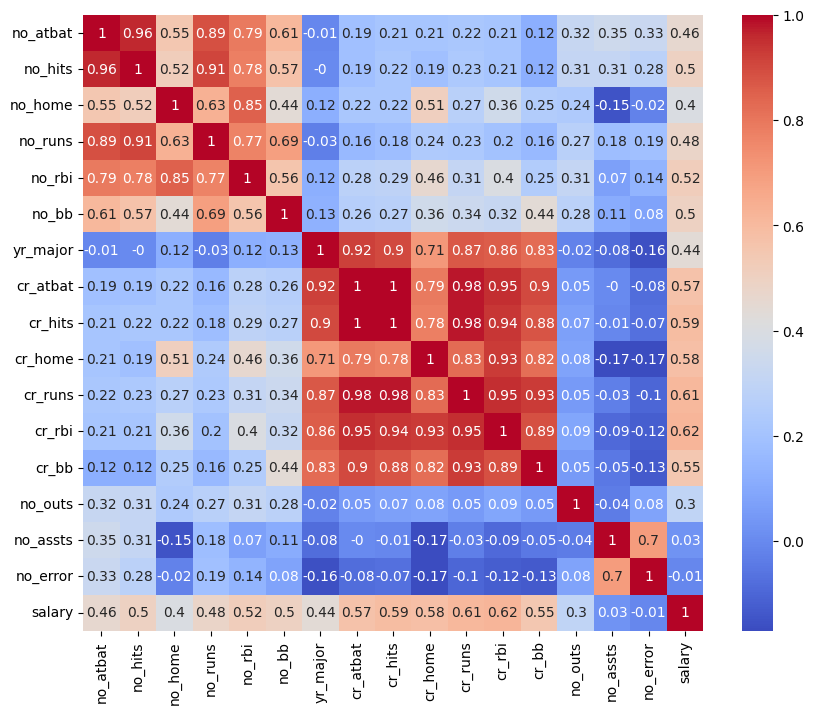

In [5]:
# First step is to look at some correlations between our explanatory variables and our response variable

# Display summary statistics
print(baseball_data2.describe())

# Compute correlations
# This will compute correlations between all the variables in the dataset, not just between x and y but between all the x variables as well
cormat = baseball_data2.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
# Warmer colors = strong positive correlations; colder colors = strong negative correlations
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()


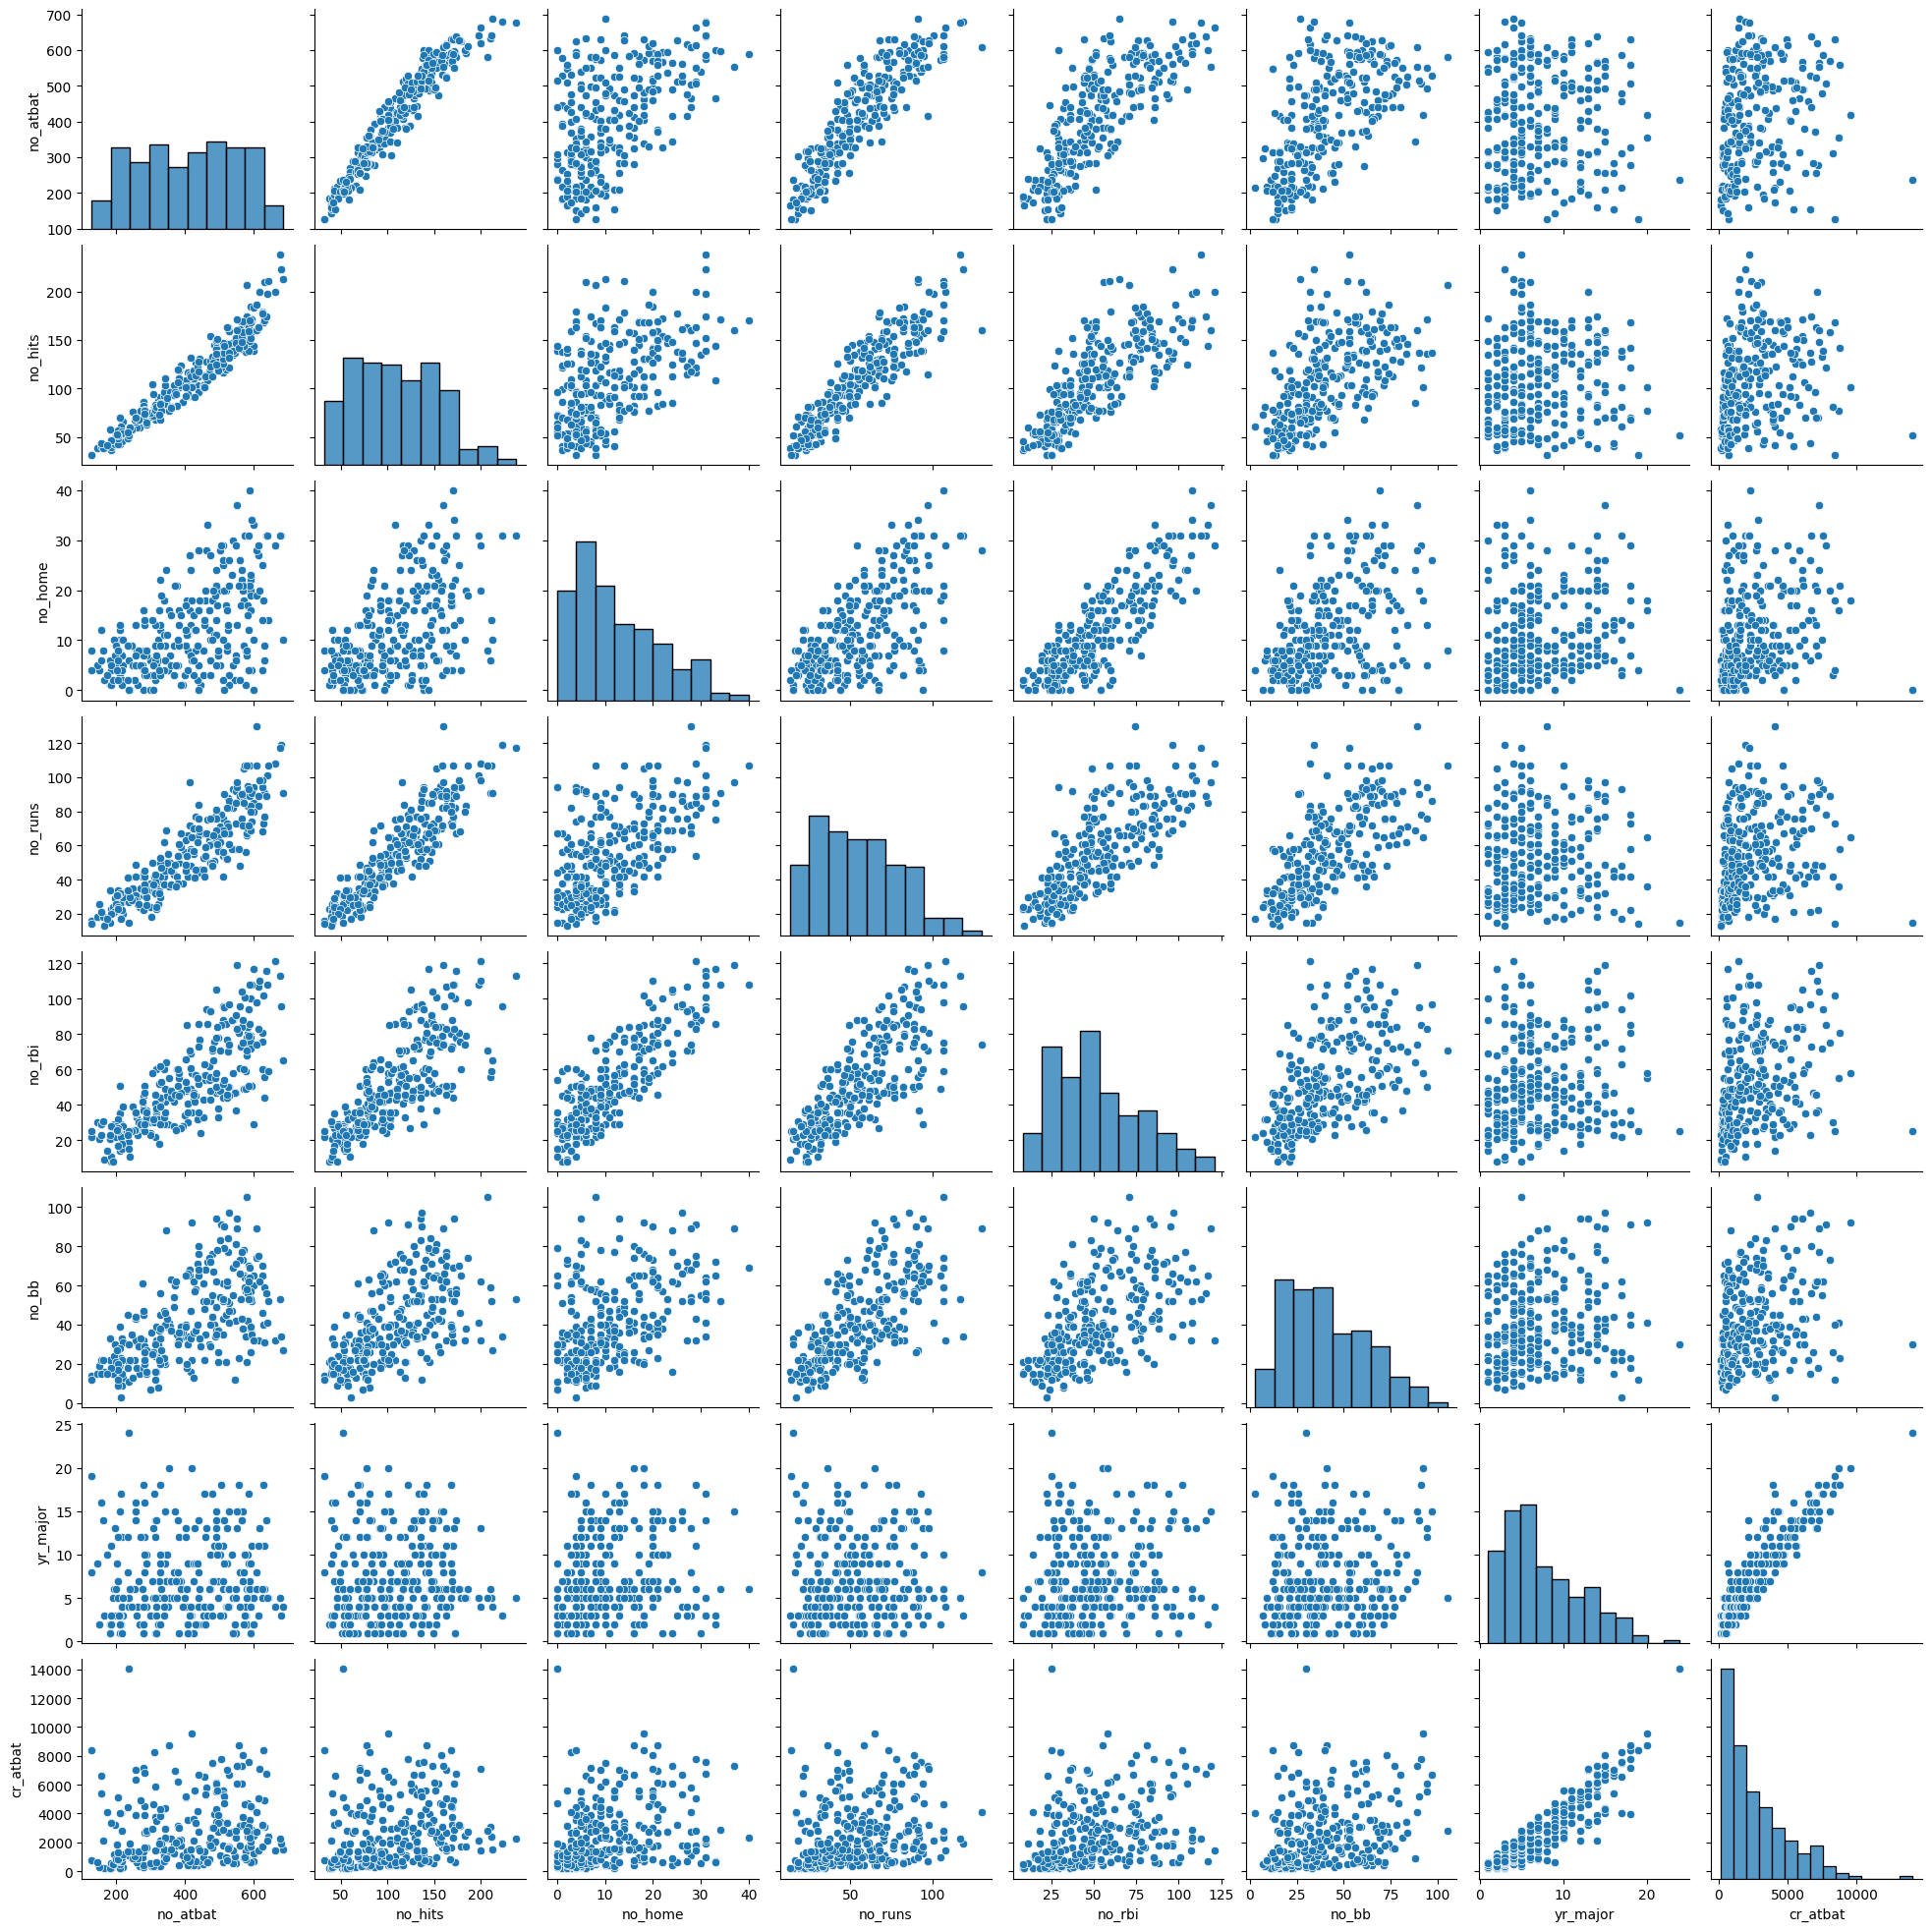

In [6]:
# Create scatterplot matrix
# This is looking at the first 10 variables
# Look for linear relationships
sns.pairplot(baseball_data.iloc[:,:10])
plt.show()

Fit Full Regression Model

In [8]:
# The full regression model will include all the x variables

# We need to drop the y variable from baseball_data2 (which currently contains all x variables plus the y variable)
# baseball_data2 will be our dataframe that contains only the x variables
X = baseball_data2.drop(columns=['salary'])

# baseball_data will be our dataframe that contains only the y variable
y = baseball_data['salary']

# We want to include a constant, i.e. an intercept
# We need to ensure there's a column represented in our x dataframe that includes the intercept
X = sm.add_constant(X)

# Fit regression model using statsmodels - sm.OLS is the function that will implement regression in statsmodels
# Give it our y dataframe and our X dataframe
# .fit says go ahead and do ordinary least squares and fit the model and estimate the coefficiants; the output will include the p-values
fullreg = sm.OLS(y, X).fit()

# Assign this fitted model to an object called full reg, which will contain the entire output from the ordinary least squares fit
# The summary will include a table that has our R-squared, adjusted R-squared, coefficient values, p-values
print(fullreg.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     23.79
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           3.73e-41
Time:                        23:05:14   Log-Likelihood:                -1857.1
No. Observations:                 263   AIC:                             3748.
Df Residuals:                     246   BIC:                             3809.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.9314     80.333     -0.447      0.6

In [9]:
# Pay attention to the F-statistic and the p-value
  # This is the combination that's testing the overall null hypothesis
  # Ho: nothing in the model is useful (x is not a useful predictor)
  # Ha: at least one variable is useful (x is a useful predictor)
# If the p-value is small we will reject the null hypothesis

# Pay attention to the R-squared value
  # This will tell us what percentage of the variability in the response variable can be explained by just these stats
  # For real data, if it's above 50%, it's not bad

# If the adjusted R-squared value is lower than the R-squared, that means there are a number of insignificant variables in the model

# The coef column gives us the values of our betas

# The P>|t| column is the p-value column, which is the p-value for testing Ho slope = 0 vs Ha slope ≠ 0

# Next step is to remove values that are insignificant, which the stepwise code cells below will perform

Calculate Variance Inflation Factors (VIF) for full model

In [10]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)


    Variable         VIF
0      const   19.948458
1   no_atbat   21.476555
2    no_hits   28.446736
3    no_home    7.731020
4    no_runs   14.542138
5     no_rbi   11.465480
6      no_bb    3.968938
7   yr_major    9.236838
8   cr_atbat  249.851404
9    cr_hits  497.072822
10   cr_home   50.069392
11   cr_runs  161.019424
12    cr_rbi  134.744542
13     cr_bb   20.477142
14   no_outs    1.256380
15  no_assts    2.716512
16  no_error    2.195590


Create function for automated Forward / Backward model selection

In [11]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


Automated Variable Selection

In [12]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

<ipython-input-11-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-11-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-11-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-11-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  const with p-value 0.0000
Add  cr_rbi with p-value 0.0000
Add  no_hits with p-value 0.0000
Add  no_bb with p-value 0.0008
Add  no_atbat with p-value 0.0015
Add  no_outs with p-value 0.0012


<ipython-input-11-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-11-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-11-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['const', 'cr_rbi', 'no_hits', 'no_bb', 'no_atbat', 'no_outs']


In [13]:
# Fit stepwise regression by adding the x values given above, plus a constant

X = baseball_data2[['cr_rbi', 'no_hits', 'no_bb', 'no_atbat', 'no_outs']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     71.44
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           1.19e-46
Time:                        23:05:45   Log-Likelihood:                -1865.5
No. Observations:                 263   AIC:                             3743.
Df Residuals:                     257   BIC:                             3764.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -89.1245     58.781     -1.516      0.1

In [14]:
# All remining p-values are less than the significance level of 0.05, which means these variables are significant and should be considered in the model

# Notice the coef for no_atbat is negative, meaning the more times we get atbat, the lower the salary is going to be

In [15]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)


   Variable        VIF
0     const  10.468186
1    cr_rbi   1.115121
2   no_hits  13.544553
3     no_bb   1.714687
4  no_atbat  14.523218
5   no_outs   1.129483


In [16]:
# Fit final regression (drop no_atbat to reduce multicollinearity)
X = baseball_data2[['cr_rbi', 'no_hits', 'no_bb', 'no_outs']]
X = sm.add_constant(X)
finreg = sm.OLS(y, X).fit()

# Display regression summary
print(finreg.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     82.72
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           4.28e-45
Time:                        23:05:57   Log-Likelihood:                -1871.5
No. Observations:                 263   AIC:                             3753.
Df Residuals:                     258   BIC:                             3771.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -192.9143     51.722     -3.730      0.0

In [17]:
vifresfin = pd.DataFrame()
vifresfin["Variable"] = X.columns
vifresfin["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresfin)


  Variable       VIF
0    const  7.770477
1   cr_rbi  1.113426
2  no_hits  1.541444
3    no_bb  1.605677
4  no_outs  1.124304


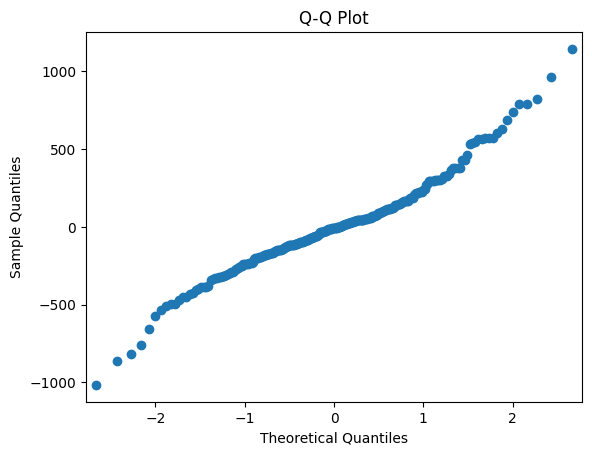

In [18]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
# We expect the Q-Q plot to follow a diagonal line pretty closely; departures from that line suggest issues with normality
fig = sm.qqplot(residuals)
plt.title('Q-Q Plot')
plt.show()

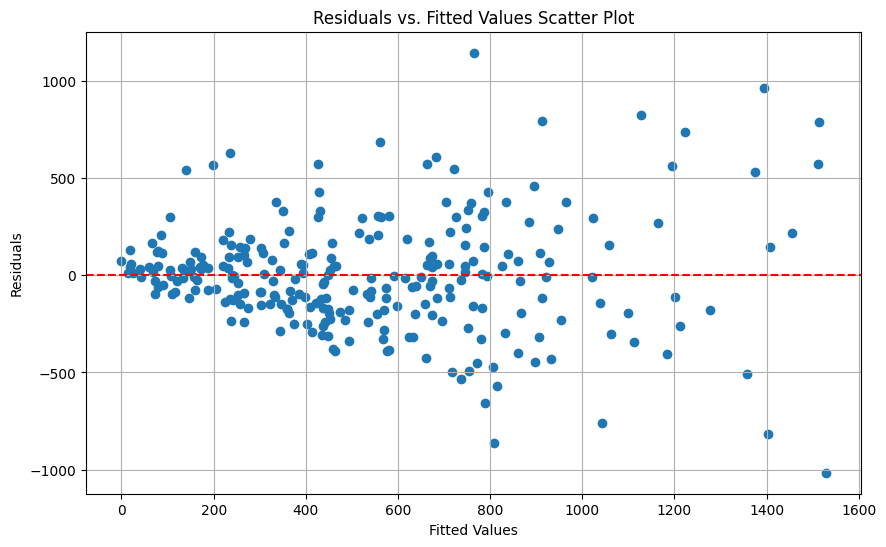

In [19]:
# Generate Residuals vs. Fitted Values scatter plot
# We expect this plot to be randomly scattered about 0, there should be no pattern
plt.figure(figsize=(10, 6))
plt.scatter(finreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Scatter Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [20]:
# Megaphone effect can be seen on this plot, meaning that as we go from left to right we're seeing the spread of the residuals increase
  # This means the variability in these residuals is changing over time
  # Suggests that we do not have constant variants = heteroskedasticity
# In this case, when we have a violation of an assumption, we have to address this and adjust things to make sure all assumptions are met before moving forward

In [22]:
# log transformed regression
X = baseball_data2[['cr_rbi', 'no_hits', 'no_bb', 'no_outs']]
X = sm.add_constant(X)
logy = np.log(y)
logreg = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     76.96
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           7.16e-43
Time:                        23:06:48   Log-Likelihood:                -238.52
No. Observations:                 263   AIC:                             487.0
Df Residuals:                     258   BIC:                             504.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5374      0.104     43.627      0.0

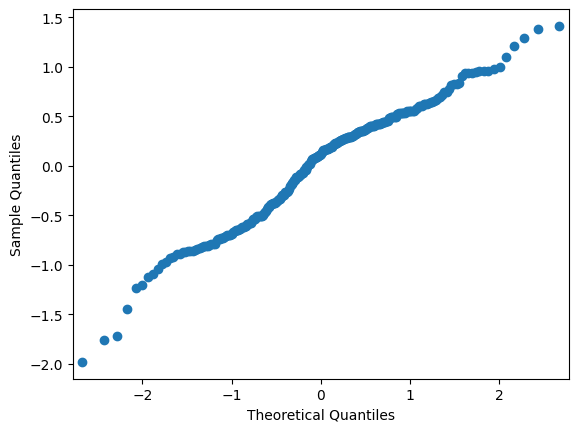

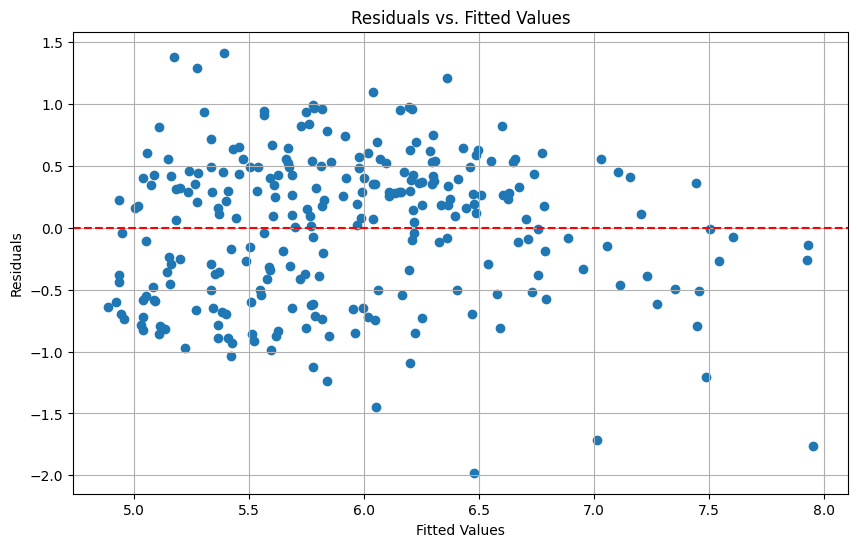

In [23]:
# Calculate residuals
residuals = logreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals)
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()